# Visualize Stock Prices and Predictions

Import necessary libraries

In [1]:
import os
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from datetime import date
from dateutil.relativedelta import relativedelta

Select stocks to visualize and predictions path if desired... *freq* must match predictions frequency

In [2]:
stocks = ['AAPL', 'AMZN']
predictions_folder = 'predictions/2023-07-18/'

Visualize current stock prices over the past 5 year

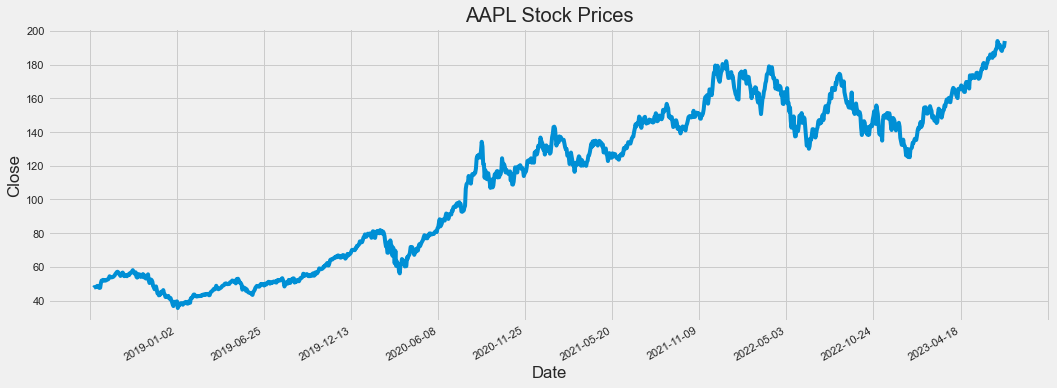

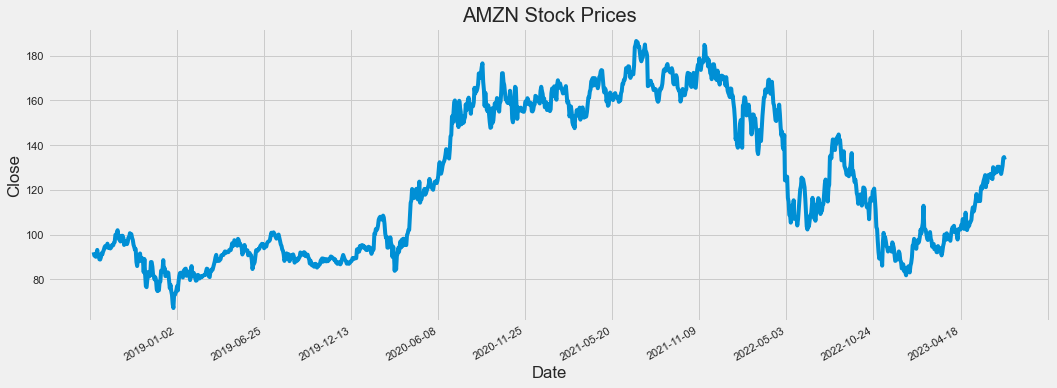

In [3]:
%matplotlib inline
sns.set()
plt.style.use('fivethirtyeight')

for x in stocks:
    now = dt.datetime.now()

    a = dt.datetime(1970,1,1,23,59,59)
    b = dt.datetime(now.year, now.month, now.day, 23, 59, 59)
    c = b - relativedelta(years=5)

    period1 = str(int((c-a).total_seconds()))   # total seconds from today since Jan. 1, 1970 subracting 5 years
    period2 = str(int((b-a).total_seconds()))   # total seconds from today since Jan. 1, 1970

    data = pd.read_csv('https://query1.finance.yahoo.com/v7/finance/download/{x}?period1={period1}&period2={period2}&interval=1d&events=history&includeAdjustedClose=true'.format(x=x, period1=period1,period2=period2))
    
    plt.figure(figsize=(16, 6))
    plt.title("{x} Stock Prices".format(x=x))
    plt.xlabel("Date")
    plt.gca().xaxis.set_major_locator(mdates.DayLocator())
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=120))
    plt.gcf().autofmt_xdate()
    plt.ylabel("Close")
    plt.plot(data["Date"], data["Close"])
    plt.show()

Visualize past data combined with predictions... Blue represents past data and red future predictions

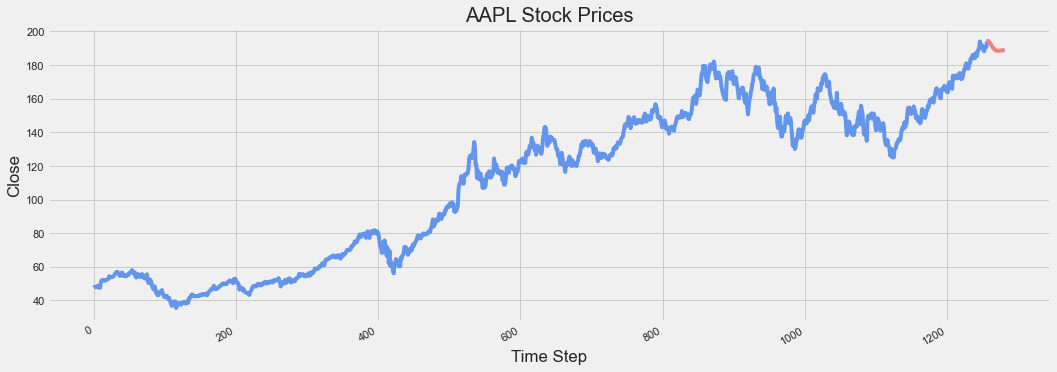

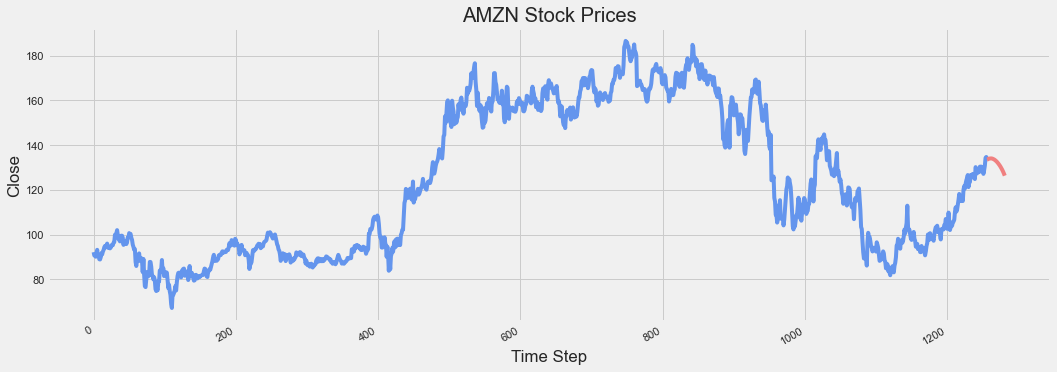

In [5]:
%matplotlib inline
sns.set()
plt.style.use('fivethirtyeight')

for x in stocks:
    predictions = pd.read_csv(os.path.join(predictions_folder, x + '.csv'))
    steps = len(predictions.index)
    data = pd.read_csv(os.path.join('daily_prices', x + '.csv'))

    all_data = pd.concat([data, predictions], ignore_index=True)

    plt.figure(figsize=(16, 6))
    plt.title("{x} Stock Prices".format(x=x))
    plt.gcf().autofmt_xdate()
    plt.ylabel("Close")
    plt.xlabel("Time Step")
    plt.plot(all_data.loc[0:len(data.index)-1, "Close"], color='cornflowerblue')
    plt.plot(all_data.loc[len(data.index)-1:,"Close"], color='lightcoral')
    plt.show()